Survived (no = 0 , yes = 1)

In [2]:
import warnings
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings('ignore',category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings('ignore',category=FitFailedWarning)

&nbsp;

## Analise dos dados

In [4]:
gender  = pd.read_csv(r'titanic/gender_submission.csv') 
train   = pd.read_csv(r'titanic/train.csv')
test    = pd.read_csv(r'titanic/test.csv')

test    = test.merge(
    right = gender,
    how   = 'inner',
    on    = 'PassengerId'
)

data  = pd.concat([train,test],axis=0)

In [5]:
data['Embarked'].loc[data['Embarked']=='C'] = 'Cherbourg'
data['Embarked'].loc[data['Embarked']=='Q'] = 'Queenstown'
data['Embarked'].loc[data['Embarked']=='S'] = 'Southampton' 

In [6]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
data.isna().nunique()

PassengerId    1
Survived       1
Pclass         1
Name           1
Sex            1
Age            2
SibSp          1
Parch          1
Ticket         1
Fare           2
Cabin          2
Embarked       2
dtype: int64

> Atributos `age` , `Fare` , `Cabin` , `Embarked` possuem atributos nulos
* **Imputar dados :**
    1. Para os atributos numericos binario irei fazer uma imputação com o interative imputer 
    2. Para os atributos numericos continuos irei fazer um imputação com simplesimputer com base na média

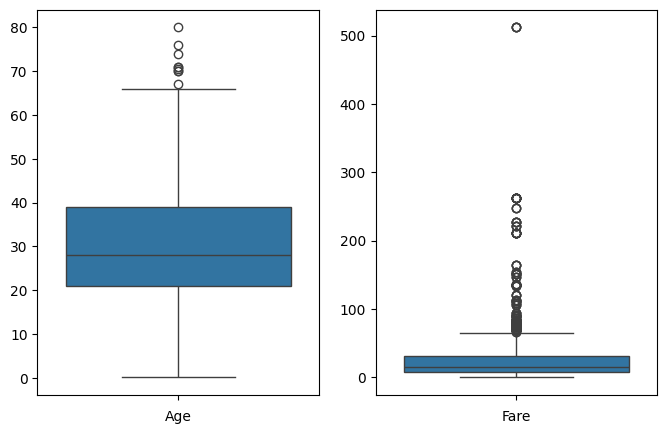

In [10]:
dataBox = data.select_dtypes(include=['float64'])
fig , ax = plt.subplots(1,2,figsize=(8,5))

for coluna,axis in zip(dataBox.columns,ax.flatten()): 
    sea.boxplot(dataBox[coluna],ax=axis)
    axis.set_xlabel(coluna)
    axis.set_ylabel('')
plt.show()

> Possui outliers , contudo , irei verificar quando for classificar se e necessário remover esse atributos

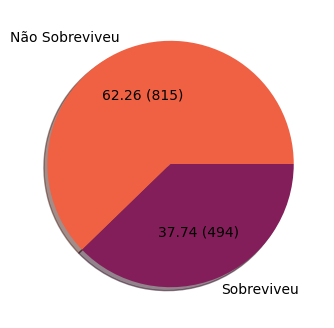

In [11]:
pizza = data['Survived'].value_counts()
color = sea.color_palette('rocket_r',n_colors=2)
plt.figure(figsize=(6,4))
plt.pie( x = pizza.values , labels = ['Não Sobreviveu','Sobreviveu'] , autopct = lambda x: '{:.2f} ({:.0f})'.format(x,(sum(pizza.values)*x)/100),colors=color,shadow=True)
plt.show()

> Classes estão desbalanceadas. Para a classificação se faz necessário o balanceamento (estrategia sea o undersampling)

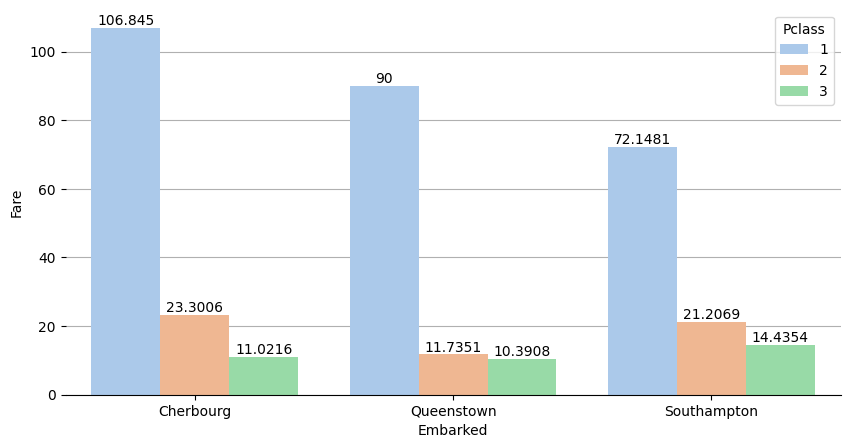

In [12]:
barData = data.groupby(by=['Pclass','Embarked'])['Fare'].mean().reset_index()

color = sea.color_palette('pastel',n_colors=3)
fig , ax = plt.subplots(1,1,figsize=(10,5))
bar = sea.barplot(x = barData['Embarked'] , y = barData['Fare'] , hue=barData['Pclass'] ,ax=ax ,palette=color)
bar.bar_label(bar.containers[0])
bar.bar_label(bar.containers[1])
bar.bar_label(bar.containers[2])

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.spines[['top','right','left']].set_visible(False)
ax.set_xlabel('Embarked')
plt.show()

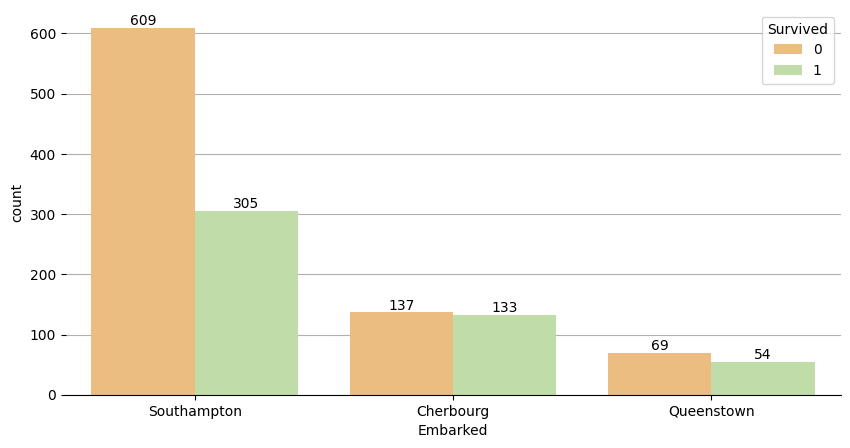

In [13]:
barData = data.groupby(by=['Survived'])['Embarked'].value_counts().reset_index()

color = sea.color_palette('Spectral',n_colors=2)
fig , ax = plt.subplots(1,1,figsize=(10,5))
bar = sea.barplot(x = barData['Embarked'] , y = barData['count'] , hue=barData['Survived'] ,ax=ax ,palette=color)
bar.bar_label(bar.containers[0])
bar.bar_label(bar.containers[1])

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.spines[['top','right','left']].set_visible(False)
ax.set_xlabel('Embarked')
plt.show()

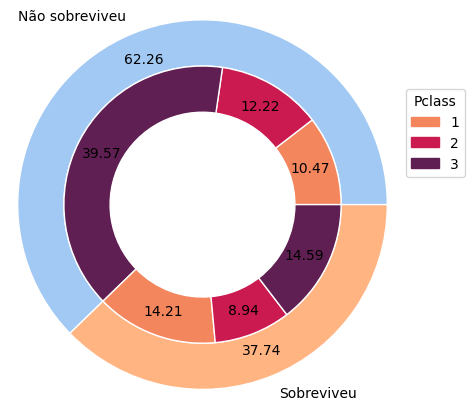

In [14]:
pizza = data.groupby(by=['Survived'])['Pclass'].value_counts().reset_index().sort_values(by='Pclass')

fig, ax = plt.subplots(1,1)
fig.set_figwidth(14)
fig.set_figheight(5)
colors1 = sea.color_palette('pastel')[0:2] 
colors2H = sea.color_palette('rocket_r',n_colors=3) 


ax.pie(x = pizza.groupby(by=['Survived'])['count'].sum(), labels= ['Não sobreviveu','Sobreviveu'] ,
       wedgeprops = dict(width=0.3, edgecolor='w'), autopct='%.2f' , pctdistance =0.85 ,colors=colors1 ,radius=1.2)

ax.pie(x = pizza.groupby(by=['Survived','Pclass'])['count'].sum() ,wedgeprops=dict(width=0.3, edgecolor='w'),
       radius=.9,autopct='%.2f',pctdistance=0.82 ,colors=colors2H )

legends = []
for value, color in zip(pizza['Pclass'].drop_duplicates().values, colors2H): 
       legends.append(mpatches.Patch(color=color, label=value))
ax.legend(title='Pclass'    ,handles=legends, bbox_to_anchor=(1.01,0.519,0,0.3))

plt.show()

In [15]:
data.groupby(by=['Embarked','Sex'])['Age'].mean()

Embarked     Sex   
Cherbourg    female    31.224490
             male      33.284386
Queenstown   female    25.458333
             male      31.557692
Southampton  female    27.877235
             male      29.942394
Name: Age, dtype: float64

In [16]:
data['Cabin'].isna()

0       True
1      False
2       True
3      False
4       True
       ...  
413     True
414    False
415     True
416     True
417     True
Name: Cabin, Length: 1309, dtype: bool

&nbsp;

&nbsp;

## Pré - processamento

In [17]:
from sklearn.experimental   import enable_iterative_imputer
from sklearn.impute         import SimpleImputer,IterativeImputer
from sklearn.linear_model   import LinearRegression
from sklearn.pipeline       import Pipeline
from sklearn.compose        import ColumnTransformer
from sklearn.base           import BaseEstimator,TransformerMixin,RegressorMixin
from sklearn.preprocessing  import LabelBinarizer,OneHotEncoder,MinMaxScaler

In [18]:
dataset = data.copy()

<Axes: >

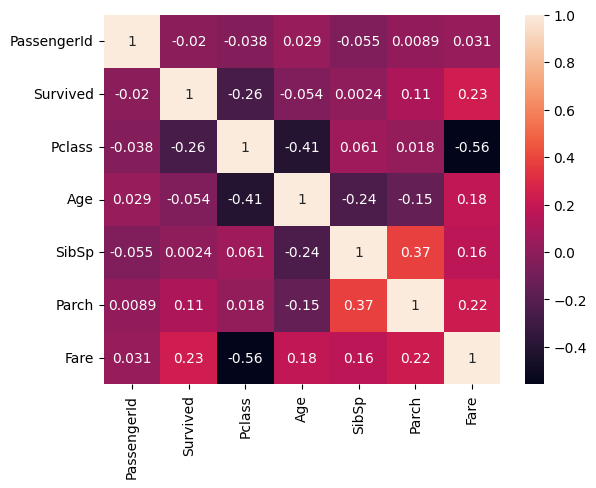

In [19]:
sea.heatmap(dataset.select_dtypes(exclude=['object']).corr(),annot=True)

Removendo colunas que não serao usadas

In [20]:
class RemovendoColunas(BaseEstimator,TransformerMixin):
    def __init__(self,colunas):
        self.columns = colunas

    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if ( self.columns == None) :
            return X
        return X.drop(columns = self.columns ,  errors='ignore')

> Será removido os atributos `Name` ,`PassengerId`, `Ticket` 

In [21]:
dataset = RemovendoColunas(['Name' ,'PassengerId', 'Ticket']).fit_transform(dataset)

In [22]:
dataset.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,Southampton
1,1,1,female,38.0,1,0,71.2833,C85,Cherbourg
2,1,3,female,26.0,0,0,7.9250,NaN,Southampton


#### Transformando os atributos

In [23]:
classesGender = LabelBinarizer()
dataset['Sex'] = classesGender.fit_transform(dataset['Sex'])

OneHotEncoder / LabelBinarizer 
> Será usando na pipeline

In [24]:
class Binarizer(BaseEstimator,TransformerMixin):
    def __init__(self,colunas = None):
        self.columns = colunas 
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        
        if ( type(self.columns)  == list):
            for coluna in self.columns:
                X[coluna] = LabelBinarizer().fit_transform(X[coluna])
            return X
        
        X[self.columns] = LabelBinarizer().fit_transform(X[self.columns])
        return X



class OneHotEncoderPandas(BaseEstimator,TransformerMixin):
    def __init__(self,colunas=None):
        self.columns = colunas

    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        if (self.columns == None): return X
    
        elif (type(self.columns) == list):
            return pd.get_dummies(X,columns=self.columns,dtype=int)
        
        return pd.get_dummies(X,columns=[self.columns],dtype=int)


class Normalização(BaseEstimator,TransformerMixin):
    def __init__(self,colunas=None):
        self.columns = colunas

    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        if ( type(self.columns)  == list):
            X[self.columns] = MinMaxScaler().fit_transform(X[self.columns])          
        else:    
            X[self.columns] = MinMaxScaler().fit_transform(X[self.columns])
        return X

In [25]:
dataset = OneHotEncoderPandas('Pclass').fit_transform(dataset)

> Essas classes serão usadas na pipeline

In [26]:
index = dataset.isna().index

In [27]:
interative = IterativeImputer(LinearRegression())

dataset[['Age','Fare']] = interative.fit_transform(dataset.select_dtypes(exclude='object'))[:,[2,5]]

In [28]:
dataset['Embarked'].loc[dataset['Embarked'].isna()] = dataset['Embarked'].mode()[0]


In [29]:
dataset = OneHotEncoderPandas('Embarked').fit_transform(dataset)

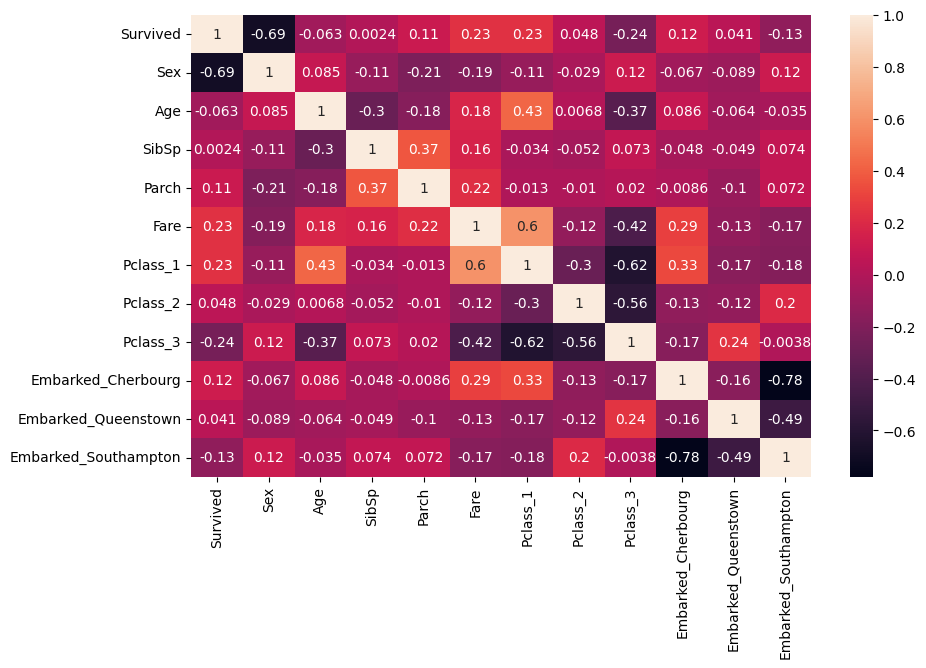

In [30]:
plt.figure(figsize=(10,6))
sea.heatmap(dataset.select_dtypes(exclude=['object']).corr(),annot=True)
plt.show()

Normalização

In [31]:
dataset[['Age','Fare']] = MinMaxScaler().fit_transform(dataset.select_dtypes(include=['float']))

In [32]:
dataset.drop(columns=['Cabin'],inplace=True)

&nbsp;

## Classificação

In [33]:
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.svm          import SVC
from sklearn.tree         import DecisionTreeClassifier
from sklearn.metrics      import *
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    train_test_split,
    StratifiedShuffleSplit
)
from sklearn.pipeline import  Pipeline
from sklearn.compose  import  make_column_transformer

In [34]:
from yellowbrick.classifier import ROCAUC

In [35]:
train = pd.read_csv('titanic/train.csv')
test  = pd.read_csv('titanic/test.csv') 
id    = pd.read_csv('titanic/gender_submission.csv')
test  = test.merge(
    right = id,
    how   = 'inner' ,
    on    = 'PassengerId' 
)

In [36]:
def preprocessamento( data ):
    interative = IterativeImputer(LinearRegression())

    data[['Age','Fare']] = interative.fit_transform(data.select_dtypes(exclude='object'))[:,[2,5]]
    
    preprocessing = Pipeline(
        steps = [
            ('RemovendoAtributos',RemovendoColunas(['Name' ,'PassengerId', 'Ticket','Cabin','Parch'])),
            ('LabelBinarizer'    ,Binarizer('Sex')),
            ('OneHotEncoder'     ,OneHotEncoderPandas(['Pclass','Embarked','Sex','SibSp'])),
            ('Normalização'      ,Normalização(['Age','Fare']))
        ]
    )
    return preprocessing.fit_transform(data)

In [37]:
train = preprocessamento(train)
test  = preprocessamento(test)

In [38]:
data = pd.concat([train,test],axis=0)
X = data.drop(columns='Survived')
Y = data['Survived']

In [39]:
xtrain , xtest , ytrain , ytest = (
    train.drop(columns=['Survived'],axis=0) ,
    test.drop(columns=['Survived'],axis=0) ,
    train['Survived'],
    test['Survived']
)

In [40]:
ytrain.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### KNN

In [41]:
params = dict(
    n_neighbors = [5,7,9,10,20],
    weights     = ['uniform', 'distance'],
    algorithm   = ['auto', 'ball_tree', 'kd_tree', 'brute'],
    leaf_size   = [30],
    p           = [2,3,5,8]
)
gridKnn = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,scoring='accuracy')
gridKnn.fit(xtrain,ytrain)

In [ ]:
gridKnn.best_estimator_,gridKnn.best_score_

(KNeighborsClassifier(algorithm='kd_tree', n_neighbors=20), 0.8047140794677045)

In [ ]:
knn = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=20)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=20)

In [ ]:
predKNN = knn.predict(xtest)

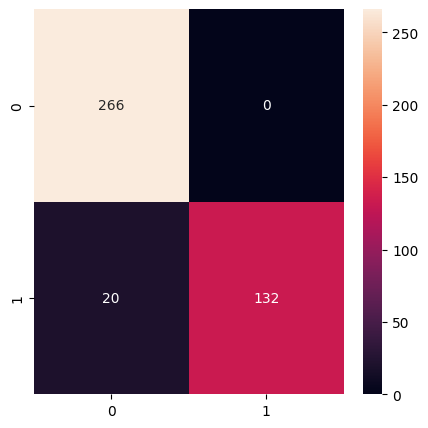

In [ ]:
plt.figure(figsize=(5,5))
sea.heatmap(confusion_matrix(ytest,predKNN),annot=True,fmt='')
plt.show()

In [ ]:
print(classification_report(ytest,predKNN))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       266
           1       1.00      0.87      0.93       152

    accuracy                           0.95       418
   macro avg       0.97      0.93      0.95       418
weighted avg       0.96      0.95      0.95       418



&nbsp;

#### SVM

In [ ]:
params = dict(
    C        = [1,2,3,5,8],
    degree   = [3,5,8],
    gamma    = ['scale', 'auto'],
    max_iter = [1000,1350,1500]
)
gridSvm = GridSearchCV(estimator=SVC(kernel='linear'),param_grid=params,scoring='accuracy')

In [ ]:
gridSvm.fit(xtrain,ytrain)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 2, 3, 5, 8], 'degree': [3, 5, 8],
                         'gamma': ['scale', 'auto'],
                         'max_iter': [1000, 1350, 1500]},
             scoring='accuracy')

In [ ]:
gridSvm.best_estimator_,' ',gridSvm.best_score_

(SVC(C=1, kernel='linear', max_iter=1000), ' ', 0.7946017199171427)

In [ ]:
svm = SVC(C=1, kernel='linear', max_iter=1000)
svm.fit(xtrain,ytrain)

SVC(C=1, kernel='linear', max_iter=1000)

In [ ]:
predSvm = svm.predict(xtest)

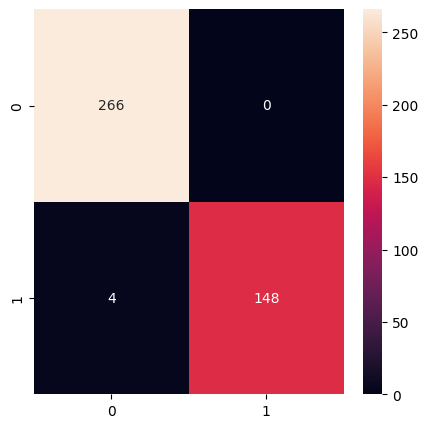

In [ ]:
plt.figure(figsize=(5,5))
sea.heatmap(confusion_matrix(ytest,predSvm),annot=True,fmt='')
plt.show()

In [ ]:
print(classification_report(ytest,predSvm))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       266
           1       1.00      0.97      0.99       152

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



In [ ]:
roc = ROCAUC(svm,binary=True)
roc.fit(xtrain,ytrain)
roc.score(xtest,ytest)
roc.show()

NameError: name 'ROCAUC' is not defined

&nbsp;

#### Desicion Tree Classifier

In [ ]:
params = dict(

)
gridTree = GridSearchCV(DecisionTreeClassifier(),scoring='accuracy')